In [ ]:
import pandas as pd
from io import StringIO
csv_data = '''A,B,C,D
              1,2,3,4
              5,6,,8
              10,11,12'''
df = pd.read_csv(StringIO(csv_data))
df

In [ ]:
df.isnull().sum()

In [ ]:
df.dropna()

In [ ]:
df.dropna(axis = 1)

In [ ]:
df.dropna(how='all')

In [ ]:
df.dropna(thresh=4)

In [ ]:
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)#axis to wartosc srednia z wiersza albo kolumny
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

In [ ]:
import pandas as pd
df = pd.DataFrame([
            ['Zielony', 'M', 10.1, 'klasa1'], 
            ['Czerwony', 'L', 13.5, 'klasa2'], 
            ['Niebieski', 'XL', 15.3, 'klasa1']])

df.columns = ['Kolor', 'Rozmiar', 'Cena', 'Etykieta klas']

In [ ]:
size_mapping = {
           'XL': 3,
           'L': 2,
           'M': 1}

df['Rozmiar'] = df['Rozmiar'].map(size_mapping)
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['Etykieta klas'].values)
y

In [ ]:
import numpy as np
class_mapping = {label:idx for idx,label in enumerate(np.unique(df['Etykieta klas']))}
df['Etykieta klas'] = df['Etykieta klas'].map(class_mapping)
df

In [33]:
from sklearn.preprocessing import OneHotEncoder
X = df[['Kolor','Rozmiar','Cena']].values
color_le = LabelEncoder()
X[:,0] = color_le.fit_transform(X[:,0])
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   0. ,   1. ,   1. ,  10.1],
       [  1. ,   0. ,   0. ,   2. ,  13.5],
       [  0. ,   1. ,   0. ,   3. ,  15.3]])

In [34]:
pd.get_dummies(df[['Cena','Kolor','Rozmiar']])

,Cena,Rozmiar,Kolor_Czerwony,Kolor_Niebieski,Kolor_Zielony
0,10.1,1,0,0,1
1,13.5,2,1,0,0
2,15.3,3,0,1,0


In [35]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine.columns = ['Etykieta klas', 'Alkohol', 'Kwas jabłkowy', 'Popiół', 
'Zasadowość popiołu', 'Magnez', 'Całk. zaw. fenoli', 
'Flawonoidy', 'Fenole nieflawonoidowe', 'Proantocyjaniny', 
'Intensywność koloru', 'Odcień', 'Transmitancja 280/315 nm', 'Prolina']

print('Etykiety klas', np.unique(df_wine['Etykieta klas']))
df_wine.head()

Etykiety klas [1 2 3]


,Etykieta klas,Alkohol,Kwas jabłkowy,Popiół,Zasadowość popiołu,Magnez,Całk. zaw. fenoli,Flawonoidy,Fenole nieflawonoidowe,Proantocyjaniny,Intensywność koloru,Odcień,Transmitancja 280/315 nm,Prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.3, random_state=0)

In [37]:
#normalizacja czyli przeskalowanie od 0 do 1
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [38]:
#standaryzacja
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [39]:
#reuralizacaj l1 i l2
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Dokładność dla danych uczących:', lr.score(X_train_std, y_train))
print('Dokładność dla danych testowych:', lr.score(X_test_std, y_test))

Dokładność dla danych uczących: 0.983870967742
Dokładność dla danych testowych: 0.981481481481


In [40]:
lr.coef_


array([[ 0.2802202 ,  0.        ,  0.        , -0.0279594 ,  0.        ,
         0.        ,  0.71026513,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.23606627],
       [-0.64397225, -0.06882052, -0.0572017 ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.92667995,
         0.06018898,  0.        , -0.37114262],
       [ 0.        ,  0.06145709,  0.        ,  0.        ,  0.        ,
         0.        , -0.63551318,  0.        ,  0.        ,  0.49783757,
        -0.35845666, -0.57186306,  0.        ]])

ValueError: Integers to negative integer powers are not allowed.

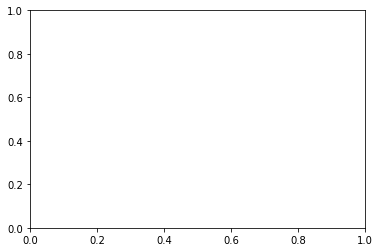

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 
         'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 
          'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4, 6):
    lr = LogisticRegression(penalty='l1', C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column+1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Współczynnik wag')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.38, 1.03),
          ncol=1, fancybox=True)
#plt.savefig('./rysunki/04_15.png', dpi=300)
plt.show()

In [42]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
                train_test_split(X, y, test_size=self.test_size, 
                                 random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

In [43]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn,k_features=1)
sbs.fit(X_train_std, y_train)

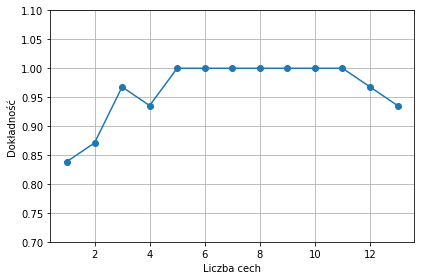

In [44]:
# dobiera cechy
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# rysuje wykres wydajności podzbiorów cech
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Dokładność')
plt.xlabel('Liczba cech')
plt.grid()
plt.tight_layout()
#plt.savefig('./rysunki/04_16.png', dpi=300)
plt.show()

In [45]:
k5 = list(sbs.subsets_[8])
knn.fit(X_train_std, y_train)
print('Dokładność dla danych uczących:', knn.score(X_train_std, y_train))
print('Dokładność dla danych testowych:', knn.score(X_test_std, y_test))

Dokładność dla danych uczących: 0.983870967742
Dokładność dla danych testowych: 0.944444444444


In [46]:
knn.fit(X_train_std[:, k5], y_train)
print('Dokładność dla danych uczących:', knn.score(X_train_std[:, k5], y_train))
print('Dokładność dla danych testowych:', knn.score(X_test_std[:, k5], y_test))

Dokładność dla danych uczących: 0.959677419355
Dokładność dla danych testowych: 0.962962962963


In [49]:
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):   
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) Intensywność koloru            0.182483
 2) Prolina                        0.158610
 3) Flawonoidy                     0.150948
 4) Transmitancja 280/315 nm       0.131987
 5) Alkohol                        0.106589
 6) Odcień                         0.078243
 7) Całk. zaw. fenoli              0.060718
 8) Zasadowość popiołu             0.032033
 9) Kwas jabłkowy                  0.025400
10) Proantocyjaniny                0.022351
11) Magnez                         0.022078
12) Fenole nieflawonoidowe         0.014645
13) Popiół                         0.013916


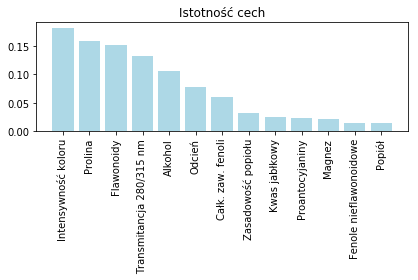

In [51]:
plt.title('Istotność cech')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()